In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from data_processing import *

In [2]:
model = load_model("output/model")

model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                       

In [3]:
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [4]:
test_x, test_y = process_batch(test_batch, 0, 1000)

In [5]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 11ms/step - loss: 0.2428 - accuracy: 0.9010


[0.24281160533428192, 0.9010000228881836]

In [15]:
def probability(model, data):
    data = data.reshape(1, 32, 32, 3)  # reshape data into model input shape
    logit = model.predict(data)  # predict logit values
    prob = tf.nn.softmax(logit)  # convert logit values to probabilities

    return np.array(prob).reshape(2,)

def show_image(axs, data):
    axs.imshow(data)
    axs.axis('off')

def print_results(prob):
    if prob[0] > 0.5:
        return "This image is most likely not an airplane with {:.2f} percent confidence.".format(prob[0]*100)
    else:
        return "This image is most likely an airplane with {:.2f} percent confidence.".format(prob[1]*100)

1/1 [==============================] - 0s 32ms/step


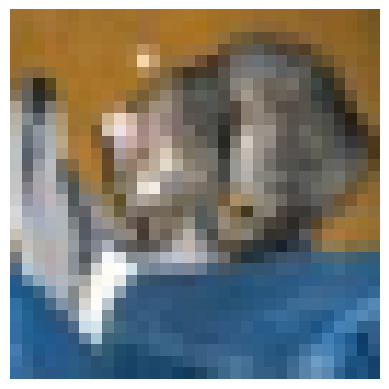

Prediction: This image is most likely not an airplane with 89.69 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 33ms/step


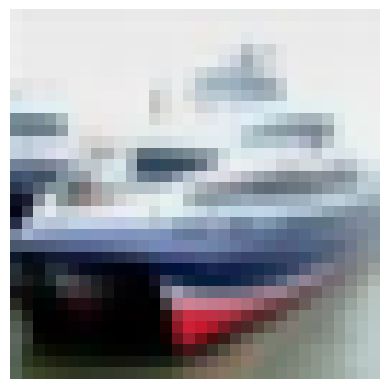

Prediction: This image is most likely not an airplane with 99.65 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 42ms/step


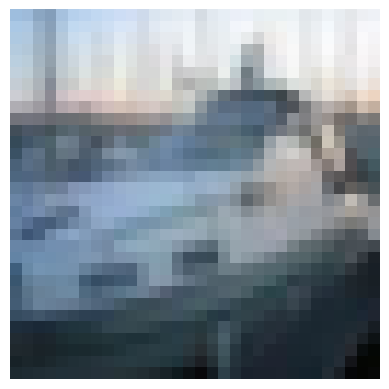

Prediction: This image is most likely not an airplane with 65.39 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 34ms/step


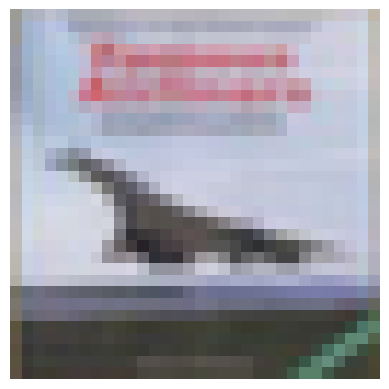

Prediction: This image is most likely an airplane with 99.83 percent confidence.
Actual: Is an airplane
1/1 [==============================] - 0s 41ms/step


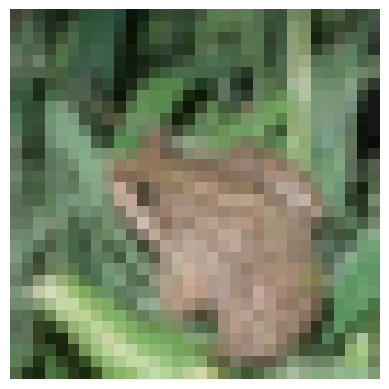

Prediction: This image is most likely not an airplane with 100.00 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 44ms/step


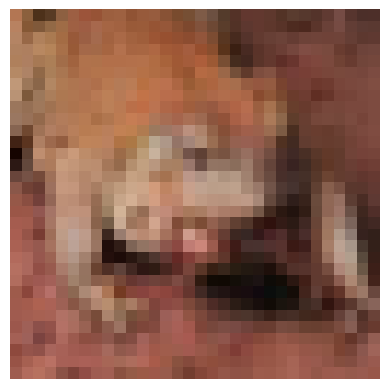

Prediction: This image is most likely not an airplane with 99.87 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 38ms/step


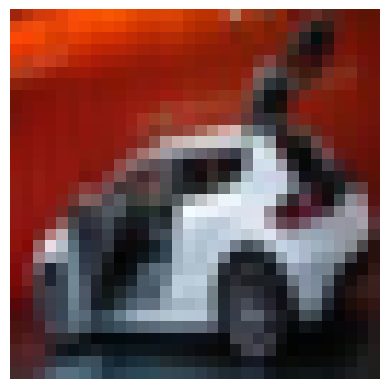

Prediction: This image is most likely not an airplane with 99.61 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 36ms/step


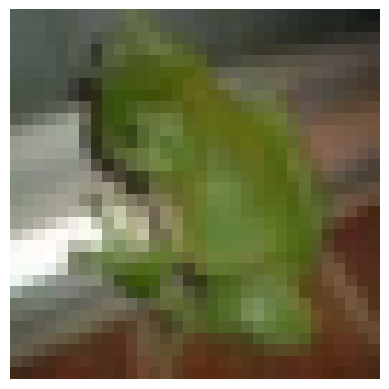

Prediction: This image is most likely not an airplane with 98.28 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 39ms/step


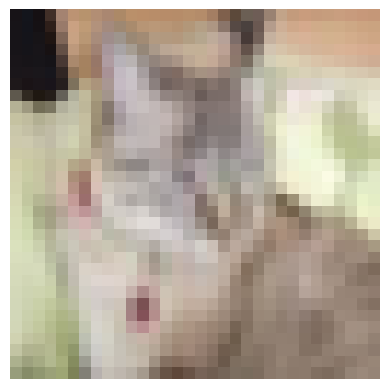

Prediction: This image is most likely not an airplane with 99.88 percent confidence.
Actual: Is not an airplane
1/1 [==============================] - 0s 34ms/step


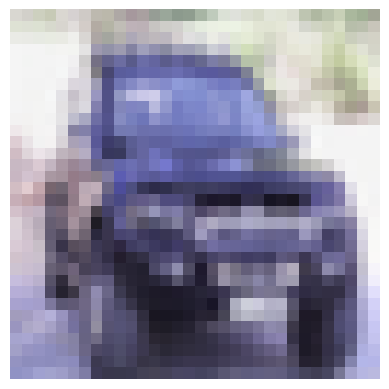

Prediction: This image is most likely not an airplane with 96.11 percent confidence.
Actual: Is not an airplane


In [16]:
for i in range(10):
    prob = probability(model, test_x[i])
    show_image(plt, test_x[i])
    plt.show()
    print(f'Prediction: {print_results(prob)}')

    actual = lambda x: 'Is an airplane' if x else 'Is not an airplane'
    
    print(f'Actual: {actual(test_y[i])}')